<a href="https://colab.research.google.com/github/divkor/pythonviz/blob/master/JobAutomationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**State of job automation in United States** 

Source for the data files is from a project on Data World (Dataset ID: wnedds/occupations-by-state-and-likelihood-of-automation).

*   Automation Probability is from a Journal Article titled 'The Future of Employment: How susceptible are jobs to computerisation?' written by Carl Benedikt Frey and Micheal A. Osbrone (http://www.oxfordmartin.ox.ac.uk/downloads/academic/The_Future_of_Employment.pdf)
*   State-wise employement and unemployment rate data is from the Bureau of Labor Statistics (https://www.bls.gov/home.htm)



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import os 
from google.colab import files
import io
import matplotlib.pyplot as plt

In [90]:
uploaded = files.upload()

Saving UnemploymentRate.csv to UnemploymentRate.csv


In [0]:
# !rm national_M2016_dl_FINAL.csv
# !rm JobsAutomationData_AllYears.csv
# !rm raw_state_automation_data_FINAL.csv
# !rm UnemploymentRate.csv
# !rm state_latlon.csv

**File**: national_M2016_dl_FINAL.csv

**Description**: May 2016 National Occupational Employment and Wage Estimates United States

**Source**: https://www.bls.gov/oes/2016/may/oes_nat.htm


---
**File**: raw_state_automation_data_FINAL.csv

**Description**: State-wise workforce employment data (Year 2016) with job automation probabilities 

**Source**: https://data.world/wnedds/occupations-by-state-and-likelihood-of-automation/workspace/file?filename=raw_state_automation_data.csv

---
**File**: raw_state_automation_data_FINAL.csv

**Description**: Annual salaries by Occupation codes from 2009-2018 (A_PCT10, A_PCT25, A_MEDIAN, A_PCT75 and A_MEAN) put together from Bureau of Labor Statistics website

**Source**: https://www.bls.gov/oes/tables.htm





In [0]:
df = pd.read_csv(io.BytesIO(uploaded['national_M2016_dl_FINAL.csv']),encoding = 'unicode_escape')

In [0]:
auto_data = pd.read_csv(io.BytesIO(uploaded['raw_state_automation_data_FINAL.csv']),encoding = 'unicode_escape')

In [0]:
job_data = pd.read_csv(io.BytesIO(uploaded['JobsAutomationData_AllYears.csv']),encoding = 'unicode_escape')

In [20]:
df.head()

,SOC_GRP,OCC_GRP,OCC_CODE,OCC_TITLE,Probability,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,0,All Occupations,00-0000,All Occupations,0.2466,total,140400040,0.1,23.86,49630,0.1,9.27,11.6,17.81,28.92,45.45,19290,24140,37040,60150,94540,NaN,NaN
1,11,Management Occupations,11-0000,Management Occupations,0.0000,major,7090790,0.2,56.74,118020,0.1,22.76,32.99,48.46,70.72,0,47330,68630,100790,147090,#,NaN,NaN
2,11,Management Occupations,11-1000,Top Executives,0.0000,minor,2465800,0.2,61.03,126950,0.2,20.58,31.45,49.19,78.35,0,42810,65420,102320,162970,#,NaN,NaN
3,11,Management Occupations,11-1010,Chief Executives,0.0150,broad,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,0,0,69780,114100,181210,0,#,NaN,NaN
4,11,Management Occupations,11-1011,Chief Executives,0.0150,detailed,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,0,0,69780,114100,181210,0,#,NaN,NaN


In [28]:
auto_data.iloc[:, 5:]

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DoC,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,...,Hawaii_pct,Idaho_pct,Illinois_pct,Indiana_pct,Iowa_pct,Kansas_pct,Kentucky_pct,Louisiana_pct,Maine_pct,Maryland_pct,Massachusetts_pct,Michigan_pct,Minnesota_pct,Mississippi_pct,Missouri_pct,Montana_pct,Nebraska_pct,Nevada_pct,New Hampshire_pct,New Jersey_pct,New Mexico_pct,New York_pct,North Carolina_pct,North Dakota_pct,Ohio_pct,Oklahoma_pct,Oregon_pct,Pennsylvania_pct,Rhode Island_pct,South Carolina_pct,South Dakota_pct,Tennessee_pct,Texas_pct,Utah_pct,Vermont_pct,Virginia_pct,Washington_pct,West Virginia_pct,Wisconsin_pct,Wyoming_pct
0,1030.0,760.0,5750.0,2710.0,31150.0,880.0,1410.0,340.0,2840.0,14120.0,6750.0,1840.0,1400.0,17440.0,4950.0,2050.0,4410.0,3440.0,1010.0,920.0,1800.0,11020.0,6260.0,7490.0,940.0,5180.0,600.0,690.0,1410.0,940.0,700.0,70.0,15410.0,4310.0,920.0,5340.0,6370.0,2650.0,9230.0,390.0,...,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.50000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.50000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.50000
1,26930.0,6490.0,43300.0,20680.0,261780.0,41540.0,33280.0,4080.0,26610.0,77340.0,90520.0,11070.0,12250.0,121040.0,49210.0,25900.0,19620.0,26190.0,29920.0,12360.0,47850.0,71880.0,58040.0,41480.0,24110.0,41440.0,4490.0,14420.0,17480.0,11030.0,44800.0,15550.0,162870.0,53770.0,7010.0,64710.0,27400.0,32350.0,70430.0,6640.0,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000
2,50.0,40.0,470.0,110.0,3760.0,480.0,300.0,0.0,220.0,750.0,820.0,200.0,160.0,3670.0,290.0,230.0,230.0,270.0,320.0,130.0,460.0,1290.0,650.0,610.0,150.0,390.0,30.0,80.0,280.0,150.0,630.0,190.0,5130.0,450.0,70.0,460.0,200.0,0.0,570.0,100.0,...,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.90000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.90000,3.900000,3.900000,3.900000,NaN,3.900000,3.900000,3.900000,NaN,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,NaN
3,530.0,200.0,4790.0,1090.0,33390.0,3060.0,4970.0,590.0,1280.0,7600.0,7140.0,540.0,860.0,14030.0,2870.0,1920.0,1470.0,1490.0,920.0,810.0,2980.0,11790.0,3870.0,7800.0,470.0,2590.0,130.0,1060.0,1640.0,1170.0,11260.0,350.0,16500.0,5650.0,310.0,5350.0,1420.0,4830.0,6250.0,550.0,...,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.40000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.40000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.40000
4,2510.0,400.0,10650.0,2650.0,69180.0,4570.0,7040.0,860.0,1180.0,13560.0,15460.0,2470.0,2200.0,24150.0,5770.0,3350.0,3250.0,3420.0,3560.0,980.0,5230.0,14860.0,10090.0,12590.0,1460.0,5480.0,190.0,1930.0,3350.0,1750.0,12840.0,1200.0,20170.0,6750.0,710.0,11410.0,3890.0,6220.0,8930.0,850.0,...,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.30000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.30000,1.300000,1.30

In [9]:
#Iterate over columns and create new column to store job displacement numbers (https://thispointer.com/pandas-loop-or-iterate-over-all-or-certain-columns-of-a-dataframe/)
for columnName,columnValue in auto_data.iloc[:, 5:].iteritems():
  auto_data[columnName+'_'+'1'] = auto_data[columnName]*auto_data['Probability']
print (auto_data.head())

   SOC_GRP                  OCC_GRP  ... Wisconsin_1 Wyoming_1
0       11   Management Occupations  ...       56.10      2.40
1       11   Management Occupations  ...     5176.00    774.40
2       11   Management Occupations  ...        7.80      0.00
3       11   Management Occupations  ...       41.72      0.42
4       11   Management Occupations  ...       74.49      2.34

[5 rows x 107 columns]


In [0]:
# Add a row with column totals 
auto_data.loc['Column_Total']= auto_data.sum(numeric_only=True, axis=0)

In [30]:
auto_data.tail()
auto_data.iloc[-1:,56:]
auto_data.iloc[-1:,5:55]

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DoC,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin
Column_Total,1722020.0,284920.0,2355040.0,1070380.0,14163090.0,2212180.0,1475400.0,371070.0,599560.0,7349340.0,3797560.0,558070.0,589520.0,5168630.0,2684160.0,1363960.0,1216310.0,1650310.0,1722150.0,527810.0,2306300.0,3069190.0,3757710.0,2501100.0,1003550.0,2443440.0,401890.0,863660.0,1140240.0,573810.0,3474620.0,716270.0,8149510.0,3760600.0,380000.0,4746300.0,1441120.0,1540720.0,5169800.0,404020.0,1801950.0,378530.0,2613670.0,10685220.0,1237590.0,264580.0,3270730.0,2726240.0,614590.0,2533000.0


In [0]:
# Calculate the % workforce automation per state. Calculation based on 2016 workforce employment figures by state from BLS website.
for columnName,columnValue in auto_data.iloc[-1:,5:56].iteritems():
    auto_data[columnName+'_'+'pct'] = (auto_data[columnName+'_'+'1']/auto_data[columnName])*100
print(auto_data.iloc[-1:,76:])

In [12]:
# Create a new dataframe to store the workforce automation percentage 
auto_data_pct = auto_data.iloc[-1:,107:]
auto_data_pct = auto_data_pct.transpose()
auto_data_pct.tail()

,Column_Total
Virginia_pct,58.043337
Washington_pct,58.977583
West Virginia_pct,62.887234
Wisconsin_pct,62.330867
Wyoming_pct,62.533510


In [0]:
auto_data_pct=auto_data_pct.reset_index()

In [0]:
auto_data_pct = auto_data_pct.rename(columns={"index": "State", "Column_Total": "pct_displcmnt"})

In [0]:
#http://www.datasciencemadesimple.com/extract-last-n-characters-from-right-of-the-column-in-pandas-python/
auto_data_pct['State'] = auto_data_pct['State'].str[0:-4]

In [31]:
auto_data_pct.head()

,State,pct_displcmnt
0,Alabama,63.952738
1,Alaska,60.106614
2,Arizona,59.652157
3,Arkansas,62.040588
4,California,59.324977


In [0]:
# df1['Probability'] = auto_data.groupby(['SOC_GRP','OCC_GRP'])['Probability'].mean()
ax = auto_data.groupby(['SOC_GRP','OCC_GRP'], as_index=False).agg({"Probability": "mean"})

In [18]:
ax.iloc[:,1:10]

,OCC_GRP,Probability
0,Management Occupations,0.158042
1,Business and Financial Operations Occupations,0.552100
2,Computer and Mathematical Occupations,0.221033
3,Architecture and Engineering Occupations,0.279382
4,"Life, Physical, and Social Science Occupations",0.249686
5,Community and Social Service Occupations,0.043262
6,Legal Occupations,0.496875
7,"Education, Training, and Library Occupations",0.225095
8,"Arts, Design, Entertainment, Sports, and Medi...",0.238014
9,Healthcare Practitioners and Technical Occupa...,0.183916


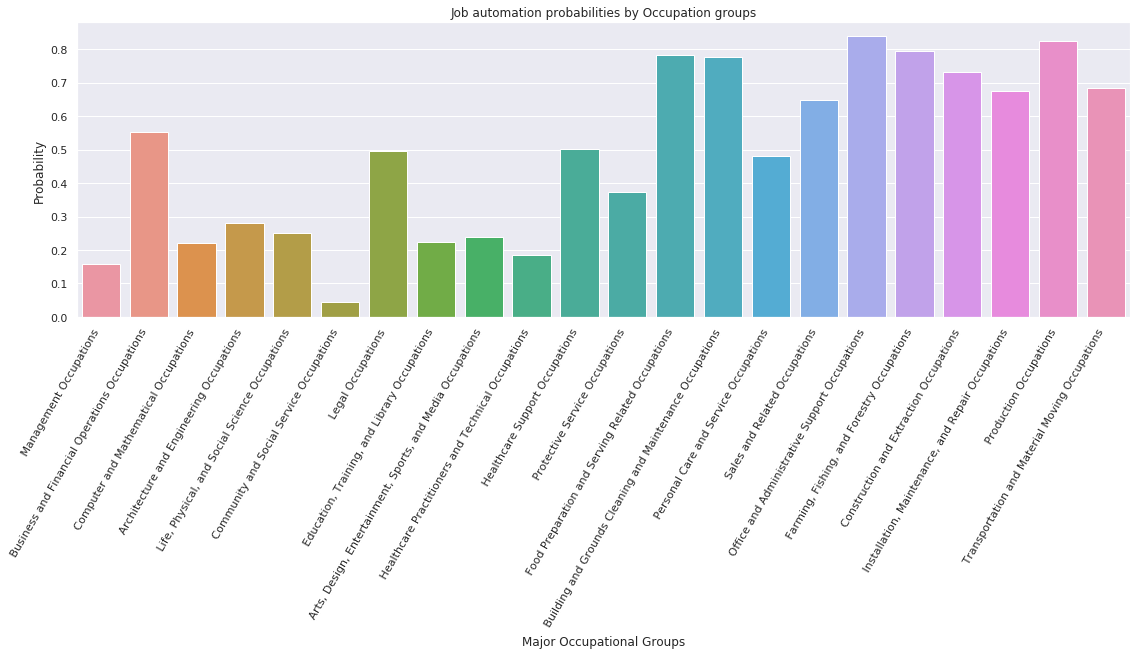

In [36]:
style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(16,9.27)})
ax1 = sns.barplot(x='OCC_GRP',y='Probability',data=ax)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha="right")
plt.xlabel('Major Occupational Groups')
plt.ylabel('Probability')
plt.title("Job automation probabilities by Occupation groups")
plt.tight_layout()
plt.show()

In [0]:
# convert columns of a DataFrame to numeric
df["A_MEDIAN"] = pd.to_numeric(df["A_MEDIAN"])
df["A_MEAN"] = pd.to_numeric(df["A_MEAN"])
df["A_PCT10"] = pd.to_numeric(df["A_PCT25"])
df["A_PCT75"] = pd.to_numeric(df["A_PCT75"])

In [0]:
# For each occupation group get the maximum of column values
aggregations = {
    "A_PCT25": "max" ,
    "A_MEDIAN": "max" ,
    "A_MEAN": "max",
    "A_PCT75": "max"
}
ax2 = df.groupby(['SOC_GRP','OCC_GRP'], as_index=False).agg(aggregations)

In [29]:
job_data.head()

,Year,SOC_CODE,SOC_GRP,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_MEAN
0,2018,00-0000,All Occupations,20690,25740,38640,62510,51960
1,2018,11-0000,Management Occupations,49260,70880,104240,151700,121560
2,2018,13-0000,Business and Financial Operations Occupations,38130,51020,68350,92870,76910
3,2018,15-0000,Computer and Mathematical Occupations,44530,61640,86340,116440,91530
4,2018,17-0000,Architecture and Engineering Occupations,44360,59750,80170,107760,87370


*   Identify occupation groups with high automation and low automation probabilities.
*  Plot the annual mean salaries from 2009-2018 for the two groups 

*   Low automation occupation groups have higher mean salaries when compared to at-risk groups
*   It seems like the annual mean salaries have been increasing for at-risk occupation groups while the mean salaries are rising at a lower rate Y-o-Y 









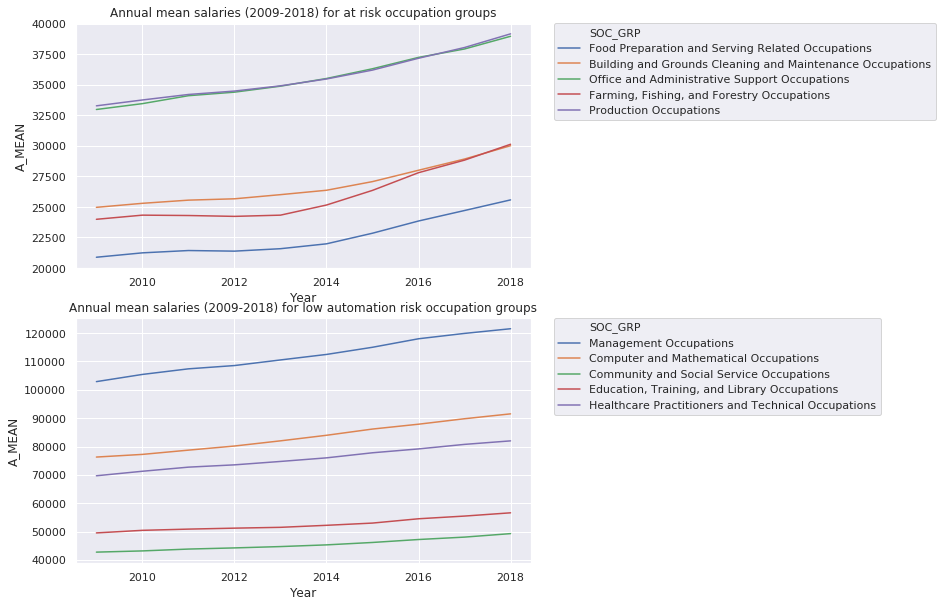

In [40]:
highauto_code = ['45-0000','43-0000','51-0000','35-0000','37-0000']
lowauto_code = ['21-0000', '11-0000', '29-0000', '15-0000', '25-0000']
plt.subplot(2,2,1)
sns.lineplot(x='Year',y='A_MEAN',hue='SOC_GRP', data=job_data[job_data['SOC_CODE'].isin(highauto_code)] )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Annual mean salaries (2009-2018) for at risk occupation groups")
plt.subplot(2,2,3)
sns.lineplot(x='Year',y='A_MEAN',hue='SOC_GRP', data=job_data[job_data['SOC_CODE'].isin(lowauto_code)] )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Annual mean salaries (2009-2018) for low automation risk occupation groups")
plt.show()

In [0]:
df2 = job_data.set_index('Year')

In [0]:
df2 = df2.sort_values(by=['Year'])

In [44]:
df2.head()

,SOC_CODE,SOC_GRP,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_MEAN
Year,,,,,,,
2009,53-0000,Transportation and Material Moving Occupations,16870,20350,28010,38880,32180
2009,00-0000,All Occupations,17140,21940,33190,52920,43460
2009,11-0000,Management Occupations,43400,61910,89330,128270,102900
2009,13-0000,Business and Financial Operations Occupations,33490,43530,58910,79550,65900
2009,15-0000,Computer and Mathematical Occupations,38590,52890,72900,95870,76290


In [0]:
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
df2['prcnt_change'] = df2.groupby(['SOC_CODE'])['A_MEAN'].pct_change()

In [46]:
df2.head()

,SOC_CODE,SOC_GRP,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_MEAN,prcnt_change
Year,,,,,,,,
2009,53-0000,Transportation and Material Moving Occupations,16870,20350,28010,38880,32180,NaN
2009,00-0000,All Occupations,17140,21940,33190,52920,43460,NaN
2009,11-0000,Management Occupations,43400,61910,89330,128270,102900,NaN
2009,13-0000,Business and Financial Operations Occupations,33490,43530,58910,79550,65900,NaN
2009,15-0000,Computer and Mathematical Occupations,38590,52890,72900,95870,76290,NaN




*  Low automation jobs:  % change in annual mean salaries (Y-o-Y) is seen on the rise for Community and social service and Education occupations and declining for Management, Computer and Healthcare Occupations.
Education,Library and Training occupation saw the highest rise and subsequent fall between 2015-17.
*  At-risk jobs: % change in annual mean salaries (Y-o-Y) is seen on the rise for all occuptaion groups. 
Farming, fishing and forestery occupations have seen a steady rise in annual salaries from 2012-16



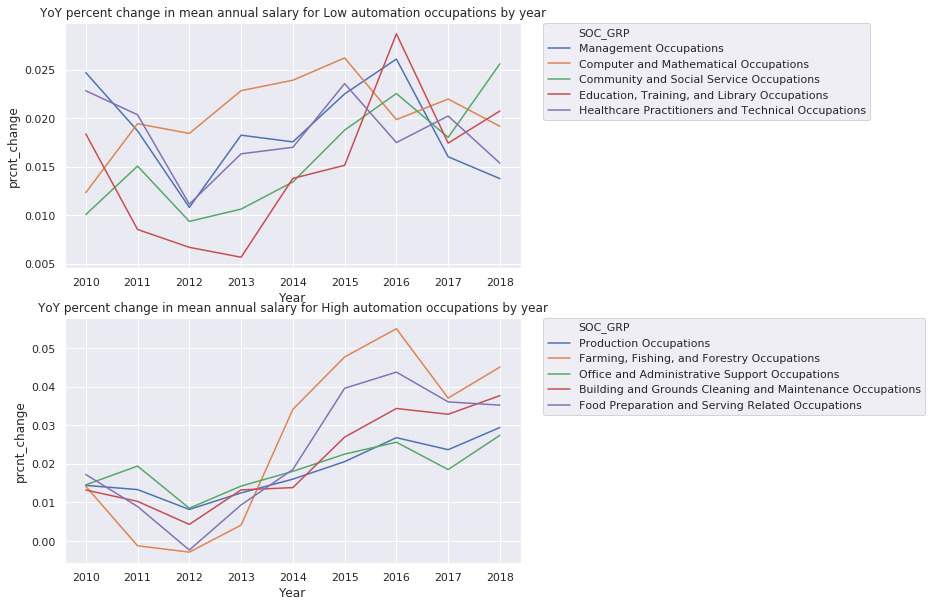

In [47]:
plt.subplot(2,2,1)
sns.lineplot(x=df2.index[df2['SOC_CODE'].isin(lowauto_code)],y='prcnt_change',hue='SOC_GRP', data=df2[df2['SOC_CODE'].isin(lowauto_code)])
plt.title('YoY percent change in mean annual salary for Low automation occupations by year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,2,3)
sns.lineplot(x=df2.index[df2['SOC_CODE'].isin(lowauto_code)],y='prcnt_change',hue='SOC_GRP', data=df2[df2['SOC_CODE'].isin(highauto_code)])
plt.title('YoY percent change in mean annual salary for High automation occupations by year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [0]:
plt.subplot(2,2,1)
sns.lineplot(x=df2.index[df2['SOC_CODE'].isin(highauto_code)],y='prcnt_change',hue='SOC_GRP', data=df2[df2['SOC_CODE'].isin(highauto_code)])
plt.title('Pct change in mean annual salary for Occupations by year')
plt.subplot(2,2,2)
sns.lineplot(x=df2.index[df2['SOC_CODE'].isin(lowauto_code)],y='prcnt_change',hue='SOC_GRP', data=df2[df2['SOC_CODE'].isin(lowauto_code)])

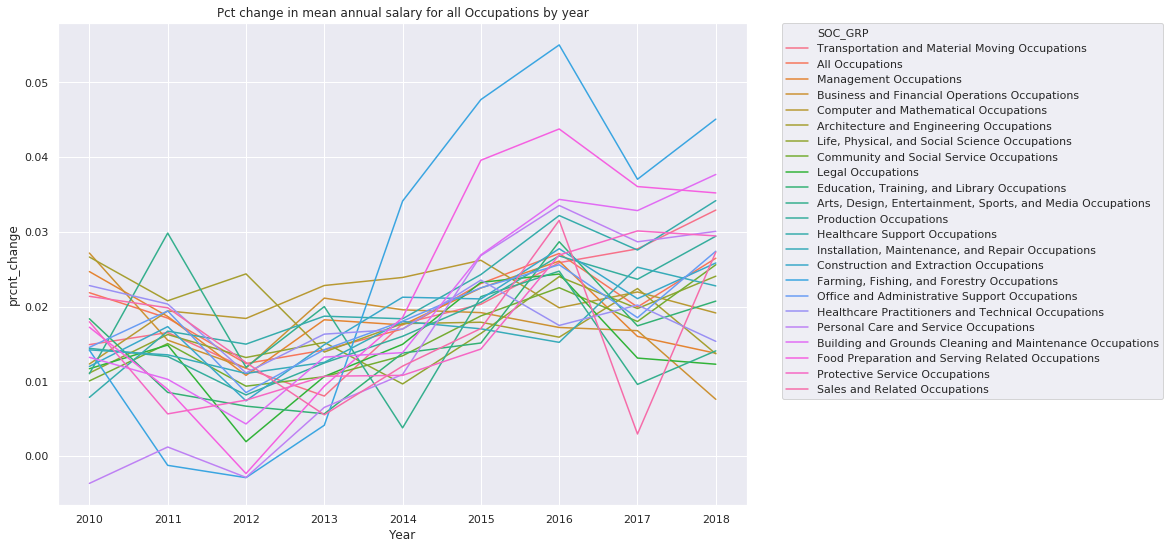

In [56]:
 sns.set(rc={'figure.figsize':(11,8.27)})
sns.lineplot(x=df2.index,y='prcnt_change',hue='SOC_GRP', data=df2)
plt.title('Pct change in mean annual salary for all Occupations by year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

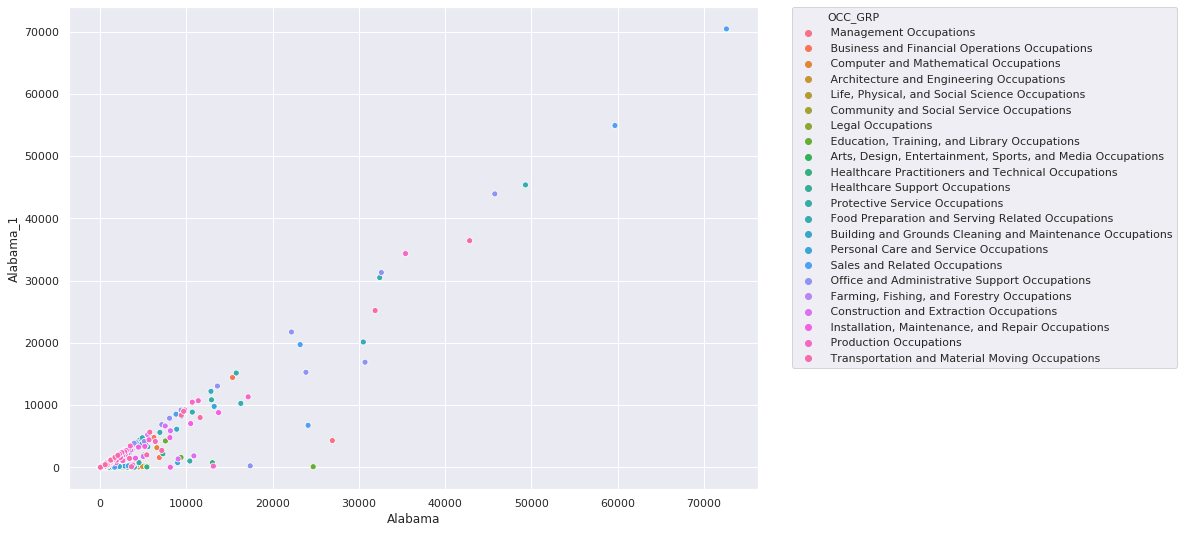

In [54]:
 sns.set(rc={'figure.figsize':(11,8.27)})
 sns.scatterplot(x='Alabama',y='Alabama_1',hue='OCC_GRP',data=auto_data)
 plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [0]:
import altair as alt
import folium

In [0]:
auto_data_pct['State'] = auto_data_pct['State'].astype('str')

In [59]:
auto_data_pct.tail()

,State,pct_displcmnt
46,Virginia,58.043337
47,Washington,58.977583
48,West Virginia,62.887234
49,Wisconsin,62.330867
50,Wyoming,62.533510


In [0]:
address_map = folium.Map(location=[48, -102], control_scale=True, zoom_start=4)

In [0]:
my_USA_map = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

In [62]:
address_map.choropleth(geo_data=my_USA_map, data=auto_data_pct,
             columns=['State', 'pct_displcmnt'],
             key_on='feature.properties.name',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2)

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [0]:
address_map

In [0]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

In [0]:
dfs = pd.read_csv(io.BytesIO(uploaded['state_latlon.csv']),encoding = 'unicode_escape')

In [73]:
dfs.head()

,State,Latitude,Longitude
0,Alabama,32.318230,-86.902298
1,Alaska,66.160507,-153.369141
2,Arizona,34.048927,-111.093735
3,Arkansas,34.799999,-92.199997
4,California,36.778259,-119.417931


In [0]:
auto_merged = pd.merge(left=auto_data_pct,right=dfs, left_on='State', right_on='State')

In [0]:
#auto_merged['pct_displcmnt'] = auto_merged['pct_displcmnt'].round(2)
auto_merged['text'] = auto_merged['State'] + '<br>Job automation: ' + (auto_merged['pct_displcmnt']).astype(str)+'%'

In [0]:
auto_merged_sort = auto_merged.sort_values(['pct_displcmnt','State'], ascending=[True,True])

In [0]:
auto_merged_sort = auto_merged_sort.reset_index()

In [0]:
auto_merged_sort['pct_displcmnt'] = auto_merged_sort['pct_displcmnt'].round(2)

In [84]:
auto_merged_sort.head()

,index,State,pct_displcmnt,Latitude,Longitude,text
0,20,Massachusetts,54.53,42.407211,-71.382439,Massachusetts<br>Job automation: 54.5280029584...
1,19,Maryland,56.06,39.045753,-76.641273,Maryland<br>Job automation: 56.06068573039067%
2,6,Connecticut,56.77,41.599998,-72.699997,Connecticut<br>Job automation: 56.769894130405...
3,30,New York,57.95,43.000000,-75.000000,New York<br>Job automation: 57.95179415694931%
4,44,Virginia,58.04,37.926868,-78.024902,Virginia<br>Job automation: 58.0433366863056%


In [86]:
# src: https://plot.ly/python/bubble-maps/
limits = [(0,15),(16,25),(26,35),(36,50)] #Passing no of rows 
colors = ["lightseagreen","yellow","orange","red"]
states = []
scale = 2

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = auto_merged_sort[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['Longitude'],
        lat = df_sub['Latitude'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pct_displcmnt'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}%'.format(min(df_sub['pct_displcmnt']),max(df_sub['pct_displcmnt']))))

fig.update_layout(
        title_text = 'Estimated % workforce at risk of automation <br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

Compare **unemployment** **rates** for US states from 2009-2019

In [0]:
unemp_data = pd.read_csv(io.BytesIO(uploaded['UnemploymentRate.csv']),encoding = 'unicode_escape')

In [92]:
unemp_data.head()

,State,Oct-2009,Nov-2009,Dec-2009,Jan-2010,Feb-2010,Mar-2010,Apr-2010,May-2010,Jun-2010,Jul-2010,Aug-2010,Sep-2010,Oct-2010,Nov-2010,Dec-2010,Jan-2011,Feb-2011,Mar-2011,Apr-2011,May-2011,Jun-2011,Jul-2011,Aug-2011,Sep-2011,Oct-2011,Nov-2011,Dec-2011,Jan-2012,Feb-2012,Mar-2012,Apr-2012,May-2012,Jun-2012,Jul-2012,Aug-2012,Sep-2012,Oct-2012,Nov-2012,Dec-2012,...,Jul-2016,Aug-2016,Sep-2016,Oct-2016,Nov-2016,Dec-2016,Jan-2017,Feb-2017,Mar-2017,Apr-2017,May-2017,Jun-2017,Jul-2017,Aug-2017,Sep-2017,Oct-2017,Nov-2017,Dec-2017,Jan-2018,Feb-2018,Mar-2018,Apr-2018,May-2018,Jun-2018,Jul-2018,Aug-2018,Sep-2018,Oct-2018,Nov-2018,Dec-2018,Jan-2019,Feb-2019,Mar-2019,Apr-2019,May-2019,Jun-2019,Jul-2019,Aug-2019,Sep-2019,Oct-2019
0,Alabama,11.8,11.8,11.8,11.7,11.6,11.4,10.8,10.4,10.1,10.0,9.9,10.0,10.1,10.2,10.3,10.2,10.2,10.1,10.0,10.0,10.0,9.9,9.7,9.4,9.0,8.6,8.3,8.1,7.9,8.0,8.1,8.2,8.3,8.2,8.1,7.9,7.8,7.6,7.6,...,5.8,5.8,5.9,5.9,5.8,5.7,5.5,5.2,5.0,4.7,4.5,4.3,4.2,4.1,4.0,3.9,3.9,3.9,3.9,4.0,4.0,4.1,4.1,4.1,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,3.7,3.8,3.7,3.5,3.3,3.1,3.0,2.8
1,Alaska,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.9,7.8,7.8,7.8,7.8,7.8,7.8,7.8,7.8,7.7,7.7,7.6,7.6,7.5,7.5,7.5,7.5,7.5,7.5,7.4,7.4,7.3,7.3,7.2,7.2,7.1,7.1,7.0,7.0,7.0,7.0,7.0,...,6.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,7.0,7.0,7.0,7.0,7.0,7.0,6.9,6.9,6.8,6.8,6.7,6.7,6.7,6.6,6.6,6.6,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.4,6.4,6.3,6.2,6.2,6.2
2,Arizona,10.8,10.9,10.9,10.9,10.8,10.7,10.6,10.4,10.3,10.2,10.2,10.1,10.1,10.0,9.9,9.8,9.7,9.7,9.7,9.7,9.7,9.7,9.6,9.4,9.2,9.0,8.8,8.7,8.7,8.6,8.6,8.5,8.5,8.3,8.2,8.1,8.0,7.9,7.9,...,5.4,5.3,5.3,5.3,5.2,5.2,5.2,5.1,5.1,5.0,4.9,4.9,4.8,4.7,4.7,4.7,4.8,4.8,4.8,4.8,4.8,4.8,4.7,4.7,4.7,4.8,4.8,4.9,4.9,4.9,5.1,5.1,5.0,4.9,4.9,4.9,4.9,5.0,4.9,4.8
3,Arkansas,8.0,8.1,8.2,8.2,8.2,8.2,8.1,8.1,8.1,8.1,8.1,8.2,8.3,8.3,8.4,8.5,8.5,8.5,8.5,8.5,8.4,8.4,8.3,8.2,8.0,7.9,7.8,7.7,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.5,7.5,7.5,7.5,...,3.9,3.9,3.9,3.8,3.8,3.7,3.7,3.7,3.6,3.6,3.7,3.7,3.7,3.7,3.7,3.8,3.8,3.8,3.8,3.8,3.8,3.7,3.7,3.7,3.6,3.6,3.6,3.7,3.7,3.7,3.7,3.8,3.7,3.6,3.6,3.5,3.4,3.4,3.5,3.5
4,California,11.8,11.9,12.1,12.2,12.2,12.3,12.2,12.2,12.2,12.2,12.2,12.2,12.3,12.3,12.2,12.1,12.0,11.9,11.8,11.8,11.8,11.8,11.7,11.6,11.5,11.3,11.2,11.0,10.9,10.8,10.7,10.6,10.5,10.4,10.2,10.0,9.9,9.8,9.7,...,5.5,5.4,5.4,5.4,5.4,5.3,5.2,5.1,5.0,5.0,4.9,4.8,4.7,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.3,4.2,4.2,4.1,4.1,4.1,4.1,4.1,4.1,4.2,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0,3.9


In [0]:
unemp_data_merged = pd.merge(left=unemp_data,right=dfs, left_on='State', right_on='State')

In [94]:
unemp_data_merged.head()

,State,Oct-2009,Nov-2009,Dec-2009,Jan-2010,Feb-2010,Mar-2010,Apr-2010,May-2010,Jun-2010,Jul-2010,Aug-2010,Sep-2010,Oct-2010,Nov-2010,Dec-2010,Jan-2011,Feb-2011,Mar-2011,Apr-2011,May-2011,Jun-2011,Jul-2011,Aug-2011,Sep-2011,Oct-2011,Nov-2011,Dec-2011,Jan-2012,Feb-2012,Mar-2012,Apr-2012,May-2012,Jun-2012,Jul-2012,Aug-2012,Sep-2012,Oct-2012,Nov-2012,Dec-2012,...,Sep-2016,Oct-2016,Nov-2016,Dec-2016,Jan-2017,Feb-2017,Mar-2017,Apr-2017,May-2017,Jun-2017,Jul-2017,Aug-2017,Sep-2017,Oct-2017,Nov-2017,Dec-2017,Jan-2018,Feb-2018,Mar-2018,Apr-2018,May-2018,Jun-2018,Jul-2018,Aug-2018,Sep-2018,Oct-2018,Nov-2018,Dec-2018,Jan-2019,Feb-2019,Mar-2019,Apr-2019,May-2019,Jun-2019,Jul-2019,Aug-2019,Sep-2019,Oct-2019,Latitude,Longitude
0,Alabama,11.8,11.8,11.8,11.7,11.6,11.4,10.8,10.4,10.1,10.0,9.9,10.0,10.1,10.2,10.3,10.2,10.2,10.1,10.0,10.0,10.0,9.9,9.7,9.4,9.0,8.6,8.3,8.1,7.9,8.0,8.1,8.2,8.3,8.2,8.1,7.9,7.8,7.6,7.6,...,5.9,5.9,5.8,5.7,5.5,5.2,5.0,4.7,4.5,4.3,4.2,4.1,4.0,3.9,3.9,3.9,3.9,4.0,4.0,4.1,4.1,4.1,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,3.7,3.8,3.7,3.5,3.3,3.1,3.0,2.8,32.318230,-86.902298
1,Alaska,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.9,7.8,7.8,7.8,7.8,7.8,7.8,7.8,7.8,7.7,7.7,7.6,7.6,7.5,7.5,7.5,7.5,7.5,7.5,7.4,7.4,7.3,7.3,7.2,7.2,7.1,7.1,7.0,7.0,7.0,7.0,7.0,...,6.9,6.9,6.9,6.9,6.9,6.9,6.9,7.0,7.0,7.0,7.0,7.0,7.0,6.9,6.9,6.8,6.8,6.7,6.7,6.7,6.6,6.6,6.6,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.4,6.4,6.3,6.2,6.2,6.2,66.160507,-153.369141
2,Arizona,10.8,10.9,10.9,10.9,10.8,10.7,10.6,10.4,10.3,10.2,10.2,10.1,10.1,10.0,9.9,9.8,9.7,9.7,9.7,9.7,9.7,9.7,9.6,9.4,9.2,9.0,8.8,8.7,8.7,8.6,8.6,8.5,8.5,8.3,8.2,8.1,8.0,7.9,7.9,...,5.3,5.3,5.2,5.2,5.2,5.1,5.1,5.0,4.9,4.9,4.8,4.7,4.7,4.7,4.8,4.8,4.8,4.8,4.8,4.8,4.7,4.7,4.7,4.8,4.8,4.9,4.9,4.9,5.1,5.1,5.0,4.9,4.9,4.9,4.9,5.0,4.9,4.8,34.048927,-111.093735
3,Arkansas,8.0,8.1,8.2,8.2,8.2,8.2,8.1,8.1,8.1,8.1,8.1,8.2,8.3,8.3,8.4,8.5,8.5,8.5,8.5,8.5,8.4,8.4,8.3,8.2,8.0,7.9,7.8,7.7,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.5,7.5,7.5,7.5,...,3.9,3.8,3.8,3.7,3.7,3.7,3.6,3.6,3.7,3.7,3.7,3.7,3.7,3.8,3.8,3.8,3.8,3.8,3.8,3.7,3.7,3.7,3.6,3.6,3.6,3.7,3.7,3.7,3.7,3.8,3.7,3.6,3.6,3.5,3.4,3.4,3.5,3.5,34.799999,-92.199997
4,California,11.8,11.9,12.1,12.2,12.2,12.3,12.2,12.2,12.2,12.2,12.2,12.2,12.3,12.3,12.2,12.1,12.0,11.9,11.8,11.8,11.8,11.8,11.7,11.6,11.5,11.3,11.2,11.0,10.9,10.8,10.7,10.6,10.5,10.4,10.2,10.0,9.9,9.8,9.7,...,5.4,5.4,5.4,5.3,5.2,5.1,5.0,5.0,4.9,4.8,4.7,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.3,4.2,4.2,4.1,4.1,4.1,4.1,4.1,4.1,4.2,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0,3.9,36.778259,-119.417931


In [0]:
#Re-arrange columns
col = unemp_data_merged.pop("Latitude")
unemp_data_merged.insert(1, col.name, col)

In [0]:
col1 = unemp_data_merged.pop("Longitude")
unemp_data_merged.insert(2, col1.name, col1)

In [97]:
unemp_data_merged.head()

,State,Latitude,Longitude,Oct-2009,Nov-2009,Dec-2009,Jan-2010,Feb-2010,Mar-2010,Apr-2010,May-2010,Jun-2010,Jul-2010,Aug-2010,Sep-2010,Oct-2010,Nov-2010,Dec-2010,Jan-2011,Feb-2011,Mar-2011,Apr-2011,May-2011,Jun-2011,Jul-2011,Aug-2011,Sep-2011,Oct-2011,Nov-2011,Dec-2011,Jan-2012,Feb-2012,Mar-2012,Apr-2012,May-2012,Jun-2012,Jul-2012,Aug-2012,Sep-2012,Oct-2012,...,Jul-2016,Aug-2016,Sep-2016,Oct-2016,Nov-2016,Dec-2016,Jan-2017,Feb-2017,Mar-2017,Apr-2017,May-2017,Jun-2017,Jul-2017,Aug-2017,Sep-2017,Oct-2017,Nov-2017,Dec-2017,Jan-2018,Feb-2018,Mar-2018,Apr-2018,May-2018,Jun-2018,Jul-2018,Aug-2018,Sep-2018,Oct-2018,Nov-2018,Dec-2018,Jan-2019,Feb-2019,Mar-2019,Apr-2019,May-2019,Jun-2019,Jul-2019,Aug-2019,Sep-2019,Oct-2019
0,Alabama,32.318230,-86.902298,11.8,11.8,11.8,11.7,11.6,11.4,10.8,10.4,10.1,10.0,9.9,10.0,10.1,10.2,10.3,10.2,10.2,10.1,10.0,10.0,10.0,9.9,9.7,9.4,9.0,8.6,8.3,8.1,7.9,8.0,8.1,8.2,8.3,8.2,8.1,7.9,7.8,...,5.8,5.8,5.9,5.9,5.8,5.7,5.5,5.2,5.0,4.7,4.5,4.3,4.2,4.1,4.0,3.9,3.9,3.9,3.9,4.0,4.0,4.1,4.1,4.1,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,3.7,3.8,3.7,3.5,3.3,3.1,3.0,2.8
1,Alaska,66.160507,-153.369141,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.9,7.8,7.8,7.8,7.8,7.8,7.8,7.8,7.8,7.7,7.7,7.6,7.6,7.5,7.5,7.5,7.5,7.5,7.5,7.4,7.4,7.3,7.3,7.2,7.2,7.1,7.1,7.0,7.0,7.0,...,6.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,7.0,7.0,7.0,7.0,7.0,7.0,6.9,6.9,6.8,6.8,6.7,6.7,6.7,6.6,6.6,6.6,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.4,6.4,6.3,6.2,6.2,6.2
2,Arizona,34.048927,-111.093735,10.8,10.9,10.9,10.9,10.8,10.7,10.6,10.4,10.3,10.2,10.2,10.1,10.1,10.0,9.9,9.8,9.7,9.7,9.7,9.7,9.7,9.7,9.6,9.4,9.2,9.0,8.8,8.7,8.7,8.6,8.6,8.5,8.5,8.3,8.2,8.1,8.0,...,5.4,5.3,5.3,5.3,5.2,5.2,5.2,5.1,5.1,5.0,4.9,4.9,4.8,4.7,4.7,4.7,4.8,4.8,4.8,4.8,4.8,4.8,4.7,4.7,4.7,4.8,4.8,4.9,4.9,4.9,5.1,5.1,5.0,4.9,4.9,4.9,4.9,5.0,4.9,4.8
3,Arkansas,34.799999,-92.199997,8.0,8.1,8.2,8.2,8.2,8.2,8.1,8.1,8.1,8.1,8.1,8.2,8.3,8.3,8.4,8.5,8.5,8.5,8.5,8.5,8.4,8.4,8.3,8.2,8.0,7.9,7.8,7.7,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.5,7.5,...,3.9,3.9,3.9,3.8,3.8,3.7,3.7,3.7,3.6,3.6,3.7,3.7,3.7,3.7,3.7,3.8,3.8,3.8,3.8,3.8,3.8,3.7,3.7,3.7,3.6,3.6,3.6,3.7,3.7,3.7,3.7,3.8,3.7,3.6,3.6,3.5,3.4,3.4,3.5,3.5
4,California,36.778259,-119.417931,11.8,11.9,12.1,12.2,12.2,12.3,12.2,12.2,12.2,12.2,12.2,12.2,12.3,12.3,12.2,12.1,12.0,11.9,11.8,11.8,11.8,11.8,11.7,11.6,11.5,11.3,11.2,11.0,10.9,10.8,10.7,10.6,10.5,10.4,10.2,10.0,9.9,...,5.5,5.4,5.4,5.4,5.4,5.3,5.2,5.1,5.0,5.0,4.9,4.8,4.7,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.3,4.2,4.2,4.1,4.1,4.1,4.1,4.1,4.1,4.2,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0,3.9


In [0]:
unemp_data_merged2=unemp_data_merged.melt(id_vars=["State", "Latitude","Longitude"], 
        var_name="year", 
        value_name="rate")

In [99]:
unemp_data_merged2.tail()

,State,Latitude,Longitude,year,rate
5924,Virginia,37.926868,-78.024902,Oct-2019,2.6
5925,Washington,47.751076,-120.740135,Oct-2019,4.5
5926,West Virginia,39.000000,-80.500000,Oct-2019,4.8
5927,Wisconsin,44.500000,-89.500000,Oct-2019,3.3
5928,Wyoming,43.075970,-107.290283,Oct-2019,3.8


Unemployment rates have declined significantly from 2009 to 2019. The rates have gone down by ~75% in states such as:

State	| Oct-09 |	Oct-19  | % change	
**Alabama**	|11.8
	 |2.8 |	-76.27%

**Florida**	|11	|3.2|	-70.91%

**Indiana** |10.6	|3.2|	-69.81%

**Michigan**	|14.1	|4.1|	-70.92%

**South Carolina**	| 11.6|	2.6|	-77.59%

The rates of unemployment are high in the states of Alaska, Louisiana, Mississippi, Nebraska, North Dakota and South Dakota. Interestingly, these states are noted as at-risk states in the plot showing (%) workforce automation by state.

In [101]:
#https://community.plot.ly/t/python-plotly-animation-tutorial-draws-every-data-instead-of-step-by-step/11189/15;https://community.plot.ly/t/solved-scatter-plot-how-to-add-custom-text-to-each-animated-frame/11430

fig = px.bar(unemp_data_merged2, x="rate", y="State", color="State",orientation='h',width=1000, height=1000,labels={'rate' +'%':'Unemployment Rate'},
  animation_frame='year',animation_group="State", range_x=[0,15])
fig.update_layout(
        title_text = 'Percent Unemployment rate from 2009-2019 by US states')
fig.show()